# Loading dataset

In [1]:
import pandas as pd

# Load datasets
cn_data_path = r"C:\Users\Admin\Downloads\Datasets-project\CN_Mobiles+-+Data.xlsx"
in_data_path = r"C:\Users\Admin\Downloads\Datasets-project\IN_Mobiles+-+Data.xlsx"

# Load sheets
cn_df = pd.read_excel(cn_data_path)
in_df = pd.read_excel(in_data_path)



In [3]:
# View structure
print("China Dataset:")
print(cn_df.info())
print(cn_df.head())

China Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          40000 non-null  object 
 1   CURR_AGE    40000 non-null  int64  
 2   GENDER      40000 non-null  object 
 3   ANN_INCOME  40000 non-null  float64
 4   AGE_PHN     40000 non-null  int64  
 5   PURCHASE    40000 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ MB
None
           ID  CURR_AGE GENDER     ANN_INCOME  AGE_PHN  PURCHASE
0  00001Q15YJ        50      M  445344.000000      439         0
1  00003I71CQ        35      M  107634.000000      283         0
2  00003N47FS        59      F  502786.666667      390         1
3  00005H41DE        43      M  585664.000000      475         0
4  00007E17UM        39      F  705722.666667      497         1


In [5]:
print("\nIndia Dataset:")
print(in_df.info())
print(in_df.head())


India Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               70000 non-null  object        
 1   CURR_AGE         70000 non-null  int64         
 2   GENDER           70000 non-null  object        
 3   ANN_INCOME       70000 non-null  int64         
 4   DT_OLD_PURCHASE  70000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.7+ MB
None
           ID  CURR_AGE GENDER  ANN_INCOME DT_OLD_PURCHASE
0  20710B05XL        54      M     1425390      2018-04-20
1  89602T51HX        47      M     1678954      2018-06-08
2  70190Z52IP        60      M      931624      2017-07-31
3  25623V15MU        55      F     1106320      2017-07-31
4  36230I68CE        32      F      748465      2019-01-27


# EDA

In [59]:
cn_df

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_PHN,PURCHASE,Income_Category,Age_Category
0,00001Q15YJ,50,M,445344.000000,439,0,Very High,46-60(Middle-Aged)
1,00003I71CQ,35,M,107634.000000,283,0,High,31-45(Adults)
2,00003N47FS,59,F,502786.666667,390,1,Very High,46-60(Middle-Aged)
3,00005H41DE,43,M,585664.000000,475,0,Very High,31-45(Adults)
4,00007E17UM,39,F,705722.666667,497,1,Very High,31-45(Adults)
...,...,...,...,...,...,...,...,...
39995,99988B18OG,49,M,478511.000000,464,1,Very High,46-60(Middle-Aged)
39996,99990Q44VP,28,M,271419.000000,61,0,Very High,19-30(Young Adults)
39997,99997Q09VJ,41,F,590704.000000,379,1,Very High,31-45(Adults)
39998,99998J59EE,50,M,363160.000000,302,1,Very High,46-60(Middle-Aged)


In [9]:
import seaborn as sns

<Axes: xlabel='GENDER', ylabel='count'>

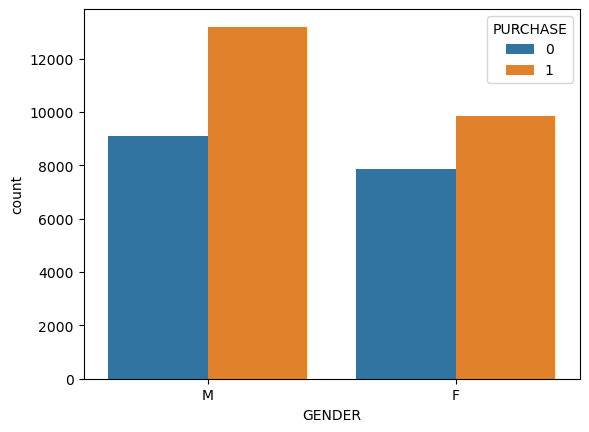

In [11]:
sns.countplot(data=cn_df,x='GENDER',hue='PURCHASE')

In [21]:
print(cn_df['ANN_INCOME'].max())

799970.6666666666


In [15]:
# Define custom income bins (adjust based on data distribution)
bins = [0, 25000, 50000, 100000, 200000, cn_df['ANN_INCOME'].max()]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Apply categorization
cn_df['Income_Category'] = pd.cut(cn_df['ANN_INCOME'], bins=bins, labels=labels, include_lowest=True)

# View distribution
print(cn_df[['ANN_INCOME', 'Income_Category']].head())


      ANN_INCOME Income_Category
0  445344.000000       Very High
1  107634.000000            High
2  502786.666667       Very High
3  585664.000000       Very High
4  705722.666667       Very High


<Axes: xlabel='Income_Category', ylabel='count'>

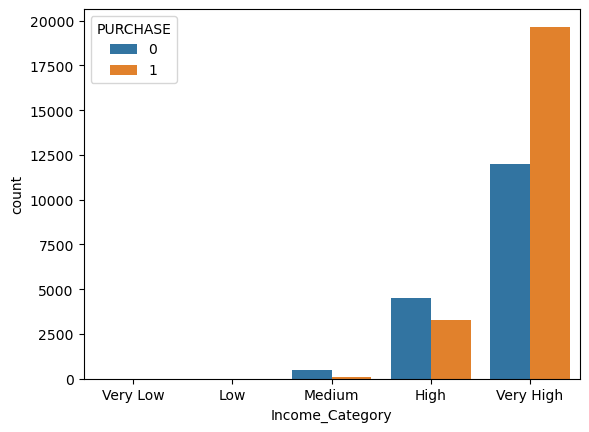

In [17]:
sns.countplot(data=cn_df,x='Income_Category',hue='PURCHASE')

In [23]:
print(cn_df['CURR_AGE'].max())

65


In [35]:
# Define custom income bins (adjust based on data distribution)
bins = [0, 18, 30, 45, 60, cn_df['CURR_AGE'].max()]  
labels = ['0-18(Teenagers)', '19-30(Young Adults)', '31-45(Adults)', '46-60(Middle-Aged)', '61+(Seniors)']

# Apply categorization
cn_df['Age_Category'] = pd.cut(cn_df['CURR_AGE'], bins=bins,labels=labels,include_lowest=True)

# View distribution
print(cn_df[['CURR_AGE', 'Age_Category']].head())

   CURR_AGE        Age_Category
0        50  46-60(Middle-Aged)
1        35       31-45(Adults)
2        59  46-60(Middle-Aged)
3        43       31-45(Adults)
4        39       31-45(Adults)


<Axes: xlabel='Age_Category', ylabel='count'>

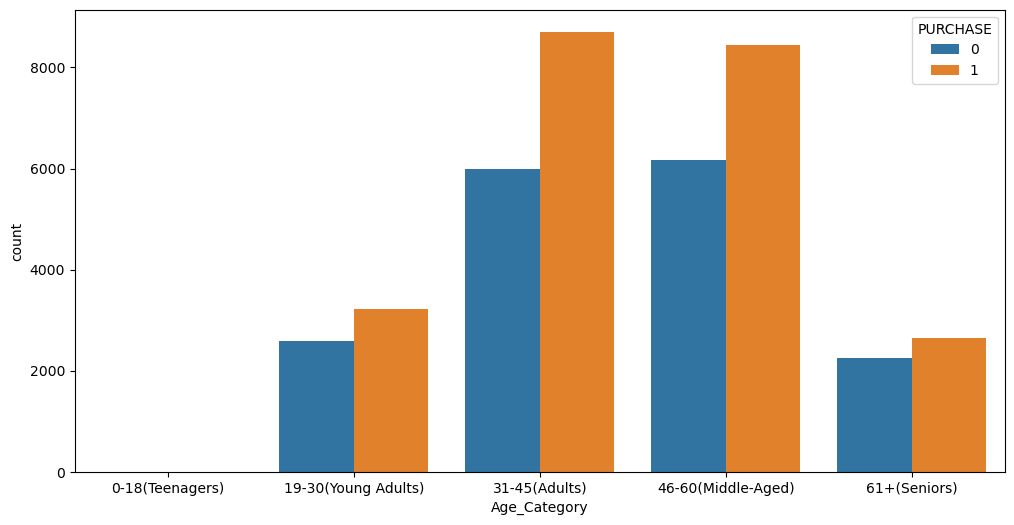

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(data=cn_df,x='Age_Category',hue='PURCHASE')

In [61]:
cn_df.drop(['Income_Category','Age_Category'],axis=1,inplace=True)

In [63]:
cn_df

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_PHN,PURCHASE
0,00001Q15YJ,50,M,445344.000000,439,0
1,00003I71CQ,35,M,107634.000000,283,0
2,00003N47FS,59,F,502786.666667,390,1
3,00005H41DE,43,M,585664.000000,475,0
4,00007E17UM,39,F,705722.666667,497,1
...,...,...,...,...,...,...
39995,99988B18OG,49,M,478511.000000,464,1
39996,99990Q44VP,28,M,271419.000000,61,0
39997,99997Q09VJ,41,F,590704.000000,379,1
39998,99998J59EE,50,M,363160.000000,302,1


In [65]:
in_df

,ID,CURR_AGE,GENDER,ANN_INCOME,DT_OLD_PURCHASE
0,20710B05XL,54,M,1425390,2018-04-20
1,89602T51HX,47,M,1678954,2018-06-08
2,70190Z52IP,60,M,931624,2017-07-31
3,25623V15MU,55,F,1106320,2017-07-31
4,36230I68CE,32,F,748465,2019-01-27
...,...,...,...,...,...
69995,35280V26PS,49,F,861770,2018-04-08
69996,79863N01VR,59,M,888976,2018-05-17
69997,94236O99QE,33,M,699676,2019-04-21
69998,23696V12DP,41,M,1881922,2018-07-14


<Axes: xlabel='CURR_AGE', ylabel='Count'>

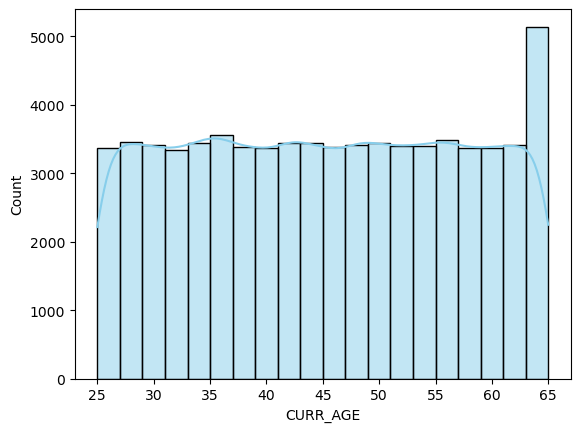

In [67]:
sns.histplot(in_df['CURR_AGE'], bins=20, kde=True, color='skyblue')

<Axes: xlabel='ANN_INCOME', ylabel='Count'>

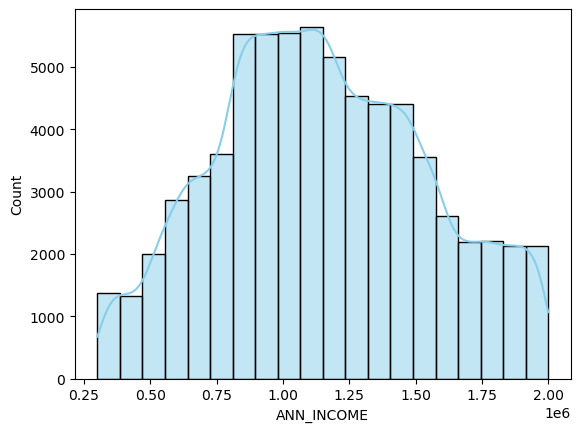

In [69]:
sns.histplot(in_df['ANN_INCOME'], bins=20, kde=True, color='skyblue')

<Axes: xlabel='GENDER', ylabel='count'>

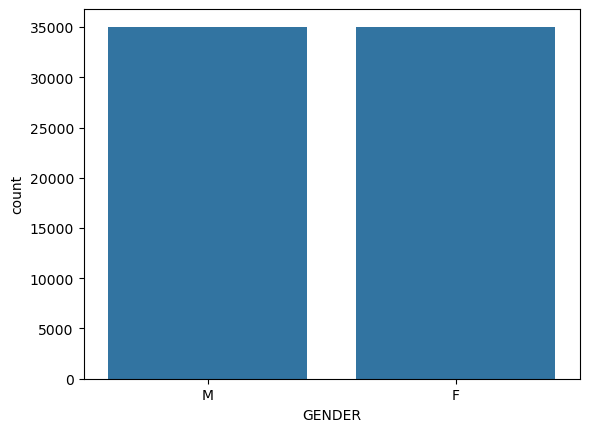

In [71]:
sns.countplot(data=in_df,x='GENDER')

# Missing value treatment

In [73]:
cn_df.isnull().sum()

ID            0
CURR_AGE      0
GENDER        0
ANN_INCOME    0
AGE_PHN       0
PURCHASE      0
dtype: int64

In [75]:
in_df.isnull().sum()

ID                 0
CURR_AGE           0
GENDER             0
ANN_INCOME         0
DT_OLD_PURCHASE    0
dtype: int64

### no missing values found, data looks ok for converting categorical to numerical using one hot encoding

In [77]:
cn_df_encoded = pd.get_dummies(cn_df,columns=['GENDER'])

In [79]:
cn_df_encoded

,ID,CURR_AGE,ANN_INCOME,AGE_PHN,PURCHASE,GENDER_F,GENDER_M
0,00001Q15YJ,50,445344.000000,439,0,False,True
1,00003I71CQ,35,107634.000000,283,0,False,True
2,00003N47FS,59,502786.666667,390,1,True,False
3,00005H41DE,43,585664.000000,475,0,False,True
4,00007E17UM,39,705722.666667,497,1,True,False
...,...,...,...,...,...,...,...
39995,99988B18OG,49,478511.000000,464,1,False,True
39996,99990Q44VP,28,271419.000000,61,0,False,True
39997,99997Q09VJ,41,590704.000000,379,1,True,False
39998,99998J59EE,50,363160.000000,302,1,False,True


In [81]:
cn_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          40000 non-null  object 
 1   CURR_AGE    40000 non-null  int64  
 2   ANN_INCOME  40000 non-null  float64
 3   AGE_PHN     40000 non-null  int64  
 4   PURCHASE    40000 non-null  int64  
 5   GENDER_F    40000 non-null  bool   
 6   GENDER_M    40000 non-null  bool   
dtypes: bool(2), float64(1), int64(3), object(1)
memory usage: 1.6+ MB


In [83]:
cn_df_encoded.drop(['GENDER_M'],axis=1,inplace=True) #to avoid multicolinarity

In [85]:
cn_df_encoded

,ID,CURR_AGE,ANN_INCOME,AGE_PHN,PURCHASE,GENDER_F
0,00001Q15YJ,50,445344.000000,439,0,False
1,00003I71CQ,35,107634.000000,283,0,False
2,00003N47FS,59,502786.666667,390,1,True
3,00005H41DE,43,585664.000000,475,0,False
4,00007E17UM,39,705722.666667,497,1,True
...,...,...,...,...,...,...
39995,99988B18OG,49,478511.000000,464,1,False
39996,99990Q44VP,28,271419.000000,61,0,False
39997,99997Q09VJ,41,590704.000000,379,1,True
39998,99998J59EE,50,363160.000000,302,1,False


In [87]:
in_df

,ID,CURR_AGE,GENDER,ANN_INCOME,DT_OLD_PURCHASE
0,20710B05XL,54,M,1425390,2018-04-20
1,89602T51HX,47,M,1678954,2018-06-08
2,70190Z52IP,60,M,931624,2017-07-31
3,25623V15MU,55,F,1106320,2017-07-31
4,36230I68CE,32,F,748465,2019-01-27
...,...,...,...,...,...
69995,35280V26PS,49,F,861770,2018-04-08
69996,79863N01VR,59,M,888976,2018-05-17
69997,94236O99QE,33,M,699676,2019-04-21
69998,23696V12DP,41,M,1881922,2018-07-14


In [89]:
cn_df_encoded['GENDER_F'] = cn_df_encoded['GENDER_F'].replace({True:1,False:0})

C:\Users\Admin\AppData\Local\Temp\ipykernel_22004\484373001.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cn_df_encoded['GENDER_F'] = cn_df_encoded['GENDER_F'].replace({True:1,False:0})


In [91]:
cn_df_encoded

,ID,CURR_AGE,ANN_INCOME,AGE_PHN,PURCHASE,GENDER_F
0,00001Q15YJ,50,445344.000000,439,0,0
1,00003I71CQ,35,107634.000000,283,0,0
2,00003N47FS,59,502786.666667,390,1,1
3,00005H41DE,43,585664.000000,475,0,0
4,00007E17UM,39,705722.666667,497,1,1
...,...,...,...,...,...,...
39995,99988B18OG,49,478511.000000,464,1,0
39996,99990Q44VP,28,271419.000000,61,0,0
39997,99997Q09VJ,41,590704.000000,379,1,1
39998,99998J59EE,50,363160.000000,302,1,0


In [93]:
in_df_encoded = pd.get_dummies(in_df,columns=['GENDER'])

In [95]:
in_df_encoded

,ID,CURR_AGE,ANN_INCOME,DT_OLD_PURCHASE,GENDER_F,GENDER_M
0,20710B05XL,54,1425390,2018-04-20,False,True
1,89602T51HX,47,1678954,2018-06-08,False,True
2,70190Z52IP,60,931624,2017-07-31,False,True
3,25623V15MU,55,1106320,2017-07-31,True,False
4,36230I68CE,32,748465,2019-01-27,True,False
...,...,...,...,...,...,...
69995,35280V26PS,49,861770,2018-04-08,True,False
69996,79863N01VR,59,888976,2018-05-17,False,True
69997,94236O99QE,33,699676,2019-04-21,False,True
69998,23696V12DP,41,1881922,2018-07-14,False,True


In [97]:
in_df_encoded.drop(['GENDER_M'],axis=1,inplace=True)

In [99]:
in_df_encoded

,ID,CURR_AGE,ANN_INCOME,DT_OLD_PURCHASE,GENDER_F
0,20710B05XL,54,1425390,2018-04-20,False
1,89602T51HX,47,1678954,2018-06-08,False
2,70190Z52IP,60,931624,2017-07-31,False
3,25623V15MU,55,1106320,2017-07-31,True
4,36230I68CE,32,748465,2019-01-27,True
...,...,...,...,...,...
69995,35280V26PS,49,861770,2018-04-08,True
69996,79863N01VR,59,888976,2018-05-17,False
69997,94236O99QE,33,699676,2019-04-21,False
69998,23696V12DP,41,1881922,2018-07-14,False


In [101]:
in_df_encoded['GENDER_F']=in_df_encoded['GENDER_F'].replace({True:1,False:0})

C:\Users\Admin\AppData\Local\Temp\ipykernel_22004\3281095431.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  in_df_encoded['GENDER_F']=in_df_encoded['GENDER_F'].replace({True:1,False:0})


In [103]:
in_df_encoded

,ID,CURR_AGE,ANN_INCOME,DT_OLD_PURCHASE,GENDER_F
0,20710B05XL,54,1425390,2018-04-20,0
1,89602T51HX,47,1678954,2018-06-08,0
2,70190Z52IP,60,931624,2017-07-31,0
3,25623V15MU,55,1106320,2017-07-31,1
4,36230I68CE,32,748465,2019-01-27,1
...,...,...,...,...,...
69995,35280V26PS,49,861770,2018-04-08,1
69996,79863N01VR,59,888976,2018-05-17,0
69997,94236O99QE,33,699676,2019-04-21,0
69998,23696V12DP,41,1881922,2018-07-14,0


# Model Training

In [ ]:
#using logistic model to predict

In [111]:
cn_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          40000 non-null  object 
 1   CURR_AGE    40000 non-null  int64  
 2   ANN_INCOME  40000 non-null  float64
 3   AGE_PHN     40000 non-null  int64  
 4   PURCHASE    40000 non-null  int64  
 5   GENDER_F    40000 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.8+ MB


In [283]:
x_cn=cn_df_encoded.drop(columns=['ID','PURCHASE'])

In [131]:
y_cn=cn_df_encoded['PURCHASE']

In [133]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler() # Xscaled=X(original)-mean/standard deviation
x_cn_scaled = sc_x.fit_transform(x_cn)

In [135]:
pd.DataFrame(x_cn_scaled)

,0,1,2,3
0,0.423230,0.490815,0.393575,-0.891588
1,-0.845813,-1.437777,-0.374667,-0.891588
2,1.184656,0.818858,0.152268,1.121594
3,-0.168990,1.292153,0.570861,-0.891588
4,-0.507401,1.977783,0.679203,1.121594
...,...,...,...,...
39995,0.338627,0.680225,0.516690,-0.891588
39996,-1.438033,-0.502435,-1.467933,-0.891588
39997,-0.338196,1.320935,0.098097,1.121594
39998,0.423230,0.021479,-0.281099,-0.891588


In [139]:
x_cn_scaled

array([[ 0.42323001,  0.49081468,  0.39357472, -0.89158809],
       [-0.84581282, -1.43777674, -0.37466663, -0.89158809],
       [ 1.18465571,  0.81885777,  0.15226814,  1.12159416],
       ...,
       [-0.33819568,  1.32093534,  0.09809728,  1.12159416],
       [ 0.42323001,  0.02147898, -0.28109877, -0.89158809],
       [ 0.08481859,  2.00592575, -0.11366155,  1.12159416]])

In [149]:
y_cn=cn_df_encoded['PURCHASE'].values
y_cn

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [193]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_cn_scaled,y_cn,test_size=0.25,random_state=123)

In [195]:
x_train

array([[-1.60723851, -0.65182905, -0.68491794, -0.89158809],
       [-0.50740139, -0.72999266, -0.5322546 , -0.89158809],
       [-1.09962138, -1.07464464, -1.09858636, -0.89158809],
       ...,
       [ 0.67703858, -0.05081202,  2.90513299,  1.12159416],
       [-0.84581282, -0.35144713, -0.7784858 ,  1.12159416],
       [-0.08438712,  0.96097272, -1.3103452 , -0.89158809]])

In [199]:
y_train

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

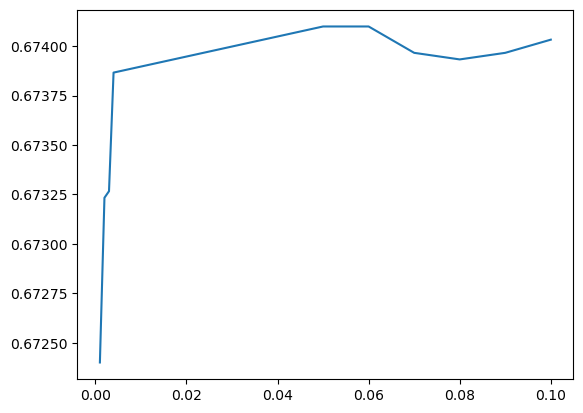

In [201]:
lamval = [0.001, 0.002, 0.003, 0.004, 0.05, 0.06,0.07,0.08,0.09,0.1]
from sklearn.model_selection import cross_val_score
cv_score = []

for l in lamval:
    lr_model = LogisticRegression(C = l,penalty='l2')
    scores = cross_val_score(lr_model,x_train,y_train,cv=3,scoring='accuracy')
    cv_score.append(scores.mean())
import matplotlib.pyplot as plt
plt.plot(lamval,cv_score)

In [235]:
cv_score

[0.6724,
 0.6732333333333335,
 0.6732666666666667,
 0.6738666666666666,
 0.6741,
 0.6741,
 0.6739666666666667,
 0.6739333333333334,
 0.6739666666666667,
 0.6740333333333334]

In [227]:
from sklearn.linear_model import LogisticRegression
lr_model_cn = LogisticRegression(C=0.06,penalty='l2')
lr_model_cn.fit(x_train,y_train)

LogisticRegression(C=0.06)

In [229]:
lr_model_cn.coef_

array([[-0.14641398,  0.4163723 ,  0.84127888, -0.1171339 ]])

In [179]:
cn_df_encoded

,ID,CURR_AGE,ANN_INCOME,AGE_PHN,PURCHASE,GENDER_F
0,00001Q15YJ,50,445344.000000,439,0,0
1,00003I71CQ,35,107634.000000,283,0,0
2,00003N47FS,59,502786.666667,390,1,1
3,00005H41DE,43,585664.000000,475,0,0
4,00007E17UM,39,705722.666667,497,1,1
...,...,...,...,...,...,...
39995,99988B18OG,49,478511.000000,464,1,0
39996,99990Q44VP,28,271419.000000,61,0,0
39997,99997Q09VJ,41,590704.000000,379,1,1
39998,99998J59EE,50,363160.000000,302,1,0


In [255]:
y_cn_pred = lr_model_cn.predict(x_test)
y_cn_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [257]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_cn_pred)

0.6739

In [239]:
confusion_matrix(y_test,y_cn_pred)

array([[2286, 1962],
       [1299, 4453]], dtype=int64)

In [259]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test,y_cn_pred))
print(recall_score(y_test,y_cn_pred))

0.6941543257989088
0.7741655076495132


In [269]:
cn_df_encoded

,ID,CURR_AGE,ANN_INCOME,AGE_PHN,PURCHASE,GENDER_F
0,00001Q15YJ,50,445344.000000,439,0,0
1,00003I71CQ,35,107634.000000,283,0,0
2,00003N47FS,59,502786.666667,390,1,1
3,00005H41DE,43,585664.000000,475,0,0
4,00007E17UM,39,705722.666667,497,1,1
...,...,...,...,...,...,...
39995,99988B18OG,49,478511.000000,464,1,0
39996,99990Q44VP,28,271419.000000,61,0,0
39997,99997Q09VJ,41,590704.000000,379,1,1
39998,99998J59EE,50,363160.000000,302,1,0


In [271]:
in_df_encoded

,ID,CURR_AGE,ANN_INCOME,DT_OLD_PURCHASE,GENDER_F
0,20710B05XL,54,1425390,2018-04-20,0
1,89602T51HX,47,1678954,2018-06-08,0
2,70190Z52IP,60,931624,2017-07-31,0
3,25623V15MU,55,1106320,2017-07-31,1
4,36230I68CE,32,748465,2019-01-27,1
...,...,...,...,...,...
69995,35280V26PS,49,861770,2018-04-08,1
69996,79863N01VR,59,888976,2018-05-17,0
69997,94236O99QE,33,699676,2019-04-21,0
69998,23696V12DP,41,1881922,2018-07-14,0


In [297]:
print(in_df_encoded.info())
print(cn_df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               70000 non-null  object        
 1   CURR_AGE         70000 non-null  int64         
 2   ANN_INCOME       70000 non-null  int64         
 3   DT_OLD_PURCHASE  70000 non-null  datetime64[ns]
 4   GENDER_F         70000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          40000 non-null  object 
 1   CURR_AGE    40000 non-null  int64  
 2   ANN_INCOME  40000 non-null  float64
 3   AGE_PHN     40000 non-null  int64  
 4   PURCHASE    40000 non-null  int64  
 5   GENDER_F    40000 non-null  int64  
dtypes: flo

In [311]:
x_in=in_df_encoded.drop(columns=['ID','DT_OLD_PURCHASE']) 

In [343]:
x_in['AGE_PHN'] = cn_df_encoded['AGE_PHN'].mean()

In [339]:
x_cn

,CURR_AGE,ANN_INCOME,AGE_PHN,GENDER_F
0,50,445344.000000,439,0
1,35,107634.000000,283,0
2,59,502786.666667,390,1
3,43,585664.000000,475,0
4,39,705722.666667,497,1
...,...,...,...,...
39995,49,478511.000000,464,0
39996,28,271419.000000,61,0
39997,41,590704.000000,379,1
39998,50,363160.000000,302,0


In [345]:
x_in

,CURR_AGE,ANN_INCOME,GENDER_F,AGE_PHN
0,54,1425390,0,359.08025
1,47,1678954,0,359.08025
2,60,931624,0,359.08025
3,55,1106320,1,359.08025
4,32,748465,1,359.08025
...,...,...,...,...
69995,49,861770,1,359.08025
69996,59,888976,0,359.08025
69997,33,699676,0,359.08025
69998,41,1881922,0,359.08025


In [347]:
x_in_scaled = sc_x.fit_transform(x_in)
x_in_scaled

array([[ 0.76168642,  0.69273529, -0.99917177,  0.        ],
       [ 0.16957193,  1.32752186, -0.99917177,  0.        ],
       [ 1.26921314, -0.54338666, -0.99917177,  0.        ],
       ...,
       [-1.01465707, -1.1240585 , -0.99917177,  0.        ],
       [-0.33795479,  1.83564352, -0.99917177,  0.        ],
       [ 0.67709864,  1.87490524, -0.99917177,  0.        ]])

In [349]:
india_predictions = lr_model_cn.predict(x_in_scaled)
india_probabilities = lr_model_cn.predict_proba(x_in_scaled)[:, 1]

In [355]:
in_df_encoded

,ID,CURR_AGE,ANN_INCOME,DT_OLD_PURCHASE,GENDER_F
0,20710B05XL,54,1425390,2018-04-20,0
1,89602T51HX,47,1678954,2018-06-08,0
2,70190Z52IP,60,931624,2017-07-31,0
3,25623V15MU,55,1106320,2017-07-31,1
4,36230I68CE,32,748465,2019-01-27,1
...,...,...,...,...,...
69995,35280V26PS,49,861770,2018-04-08,1
69996,79863N01VR,59,888976,2018-05-17,0
69997,94236O99QE,33,699676,2019-04-21,0
69998,23696V12DP,41,1881922,2018-07-14,0


In [359]:
in_df_encoded['Predicted_Purchase'] = india_predictions
in_df_encoded['Purchase_Probability'] = india_probabilities

In [361]:
in_df_encoded.head(10)

,ID,CURR_AGE,ANN_INCOME,DT_OLD_PURCHASE,GENDER_F,Predicted_Purchase,Purchase_Probability
0,20710B05XL,54,1425390,2018-04-20,0,0,0.432147
1,89602T51HX,47,1678954,2018-06-08,0,1,0.519466
2,70190Z52IP,60,931624,2017-07-31,0,0,0.296902
3,25623V15MU,55,1106320,2017-07-31,1,1,0.743547
4,36230I68CE,32,748465,2019-01-27,1,1,0.726378
5,11264G01HZ,48,1051927,2018-11-24,1,1,0.749225
6,74250S23UO,26,1076402,2018-09-22,1,1,0.800985
7,26735J66DB,45,1481949,2018-04-05,1,1,0.829188
8,93404P60ED,55,1725607,2018-01-02,0,1,0.506863
9,56557A36QV,64,312323,2018-04-23,1,1,0.531305
